# BIG doc start

## With some dependencies that you may need to install

## dont worry if you encounter some problems/errors, just make sure to download the dependencies:

- mediapipe
- opencv-python

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Hand Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect hand landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [2]:
!pip install -q mediapipe

In [3]:
print("a")

a


In [4]:
!pip install opencv-python

Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker#models) for more information about this model bundle.

In [5]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


## Visualization utilities

In [6]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

In [7]:
!ls -l

'ls' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [ ]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

In [9]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
cv2_imshow(img)

ModuleNotFoundError: No module named 'google.colab'

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

Here are the steps to run hand landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker/python) to learn more about configuration options that this solution supports.


In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

# End of the big doc start

# below is some stuff if you work on google collab

## you may want to know the fact that you can't do it on kaggle

## to do what you may ask: use you personal camera and the website (google collab/ kaggle) 

In [19]:
print("a")

a


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# ============================================================================

# Alright things are getting serious as we finally start what we doing

In [4]:
import cv2
import mediapipe as mp
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import  nan

import time
from datetime import datetime
import pytz  # Pour obtenir l'heure locale de Montréal

In [5]:
def produit_scalaire(v1, v2):
    return np.dot(v1, v2)

def norme(v):
    return np.linalg.norm(v)

def calcul_angle(v1, v2):
    dot_product = produit_scalaire(v1, v2)
    norm_v1 = norme(v1)
    norm_v2 = norme(v2)

    cos_theta = dot_product / (norm_v1 * norm_v2)
    
    angle_radians = np.arccos(cos_theta)
    angle_degrees = np.degrees(angle_radians)
    
    return angle_degrees

def angle_entre_droites(points1, points2):
    A, B, C = points1
    A_prime, B_prime, C_prime = points2
    
    v1 = B - A
    v2 = C - B
    
    v3 = B_prime - A_prime
    v4 = C_prime - B_prime
    
    angle = calcul_angle(v1, v3)
    
    return angle

In [6]:
points1 = np.array([(0, 2), (0, 4), (0, 6)])  # Trois points pour la première droite
points2 = np.array([(2,0), (4, 0), (6, 0)])  # Trois points pour la deuxième droite

angle = angle_entre_droites(points1, points2)
print(f"L'angle entre les deux droites est de {angle:.2f} degrés.")

L'angle entre les deux droites est de 90.00 degrés.


## Angle

In [7]:

def angle_bw_3points(a,b,c): 
    ba = a - b
    bc = c - b
    
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)
    

In [8]:
a=np.array([0,1])
b=np.array([0,0])
c=np.array([1,0])
print(angle_bw_3points(a,b,c))

a=np.array([0.5,0.5])
b=np.array([0,0])
c=np.array([1,0])
print(angle_bw_3points(a,b,c))

90.0
45.00000000000001


In [9]:
def anyNan(l):
    return nan in l
    

In [10]:
print(anyNan([nan]), 
      anyNan([0,1,2,nan]),
      anyNan([]),
      anyNan([1]))

True True False False


In [11]:
def compute_angles(image, landmarks):
    #print("LANDMARKS\n", landmarks,"\n======================================\n", "landmarks[5]\n",landmarks[5])
    index_angle = angle_bw_3points( np.array(landmarks[2]), np.array(landmarks[4]),  np.array(np.array(landmarks[2], landmarks[8])))
    middle_angle = angle_bw_3points(np.array(landmarks[5]), np.array(landmarks[8]),  np.array(np.array(landmarks[5], landmarks[12])))
    ring_angle = angle_bw_3points(  np.array(landmarks[9]), np.array(landmarks[12]), np.array(np.array(landmarks[9], landmarks[16])))
    pinky_angle = angle_bw_3points( np.array(landmarks[13]), np.array(landmarks[16]), np.array(np.array(landmarks[13], landmarks[20])))
    angles = [index_angle, middle_angle, ring_angle, pinky_angle]

    if anyNan(angles):
        cv2.putText(image, f'NaN', landmarks[6], 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)    
        return []
    return angles
    

In [12]:
def display_angles(image, landmarks, angles):
    if (not angles) or (anyNan(angles)):
        print("NaN")
        return
    for angle in angles:
        if math.isnan(angle):
            print("NaN")
            return
    cv2.putText(image, f'{int(angles[0])}°', landmarks[6], 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(image, f'{int(angles[1])}°', landmarks[10], 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(image, f'{int(angles[2])}°', landmarks[14], 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(image, f'{int(angles[3])}°', landmarks[18], 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2, cv2.LINE_AA)
    print("angles[0]\n",angles[0],"\nangles[1]\n",angles[1],"\nangles[2]\n",angles[2],"\nangles[3]\n",angles[3])

In [13]:
def comp_disp_keypoints(image, frame, hand_landmarks, keypoint):
    h, w, _ = image.shape
    for i, landmark in enumerate(hand_landmarks.landmark):
        x, y = int(landmark.x * w), int(landmark.y * h)  # Conversion en pixels
        if keypoint:
            cv2.putText(image , str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 
                            0.4, (0, 255, 0), 1, cv2.LINE_AA)  

In [184]:
def df_create_frame_data(frame_data, image,frame_idx, hand_landmarks):
    h, w, _ = image.shape
    for i, lm in enumerate(hand_landmarks.landmark):
        #coordonné relative
        norm_pos = np.array([lm.x, lm.y, lm.z])
        #coordonnées réelles
        real_pos = np.array([lm.x * w, lm.y * h, lm.z])
    
        frame_data[f"Keypoint {i} (Camera Relative)"] = norm_pos
        frame_data[f"Keypoint {i} (Real World)"] = real_pos
    return frame_data

def df_create_frame_data(frames_data,columns, image, frame_idx, montreal_tz, start_time, hand_landmarks):
    h, w, _ = image.shape
    relative_positions = []
    real_positions = []
    relative_time = time.time() - start_time
    absolute_time = datetime.now(montreal_tz).strftime('%Y-%m-%d %H:%M:%S.%f')

    for i, lm in enumerate(hand_landmarks.landmark):

        relative_positions.append([lm.x, lm.y, lm.z])
        real_positions.append([lm.x * w, lm.y * h, lm.z])

        frames_data.append([frame_idx, relative_time, absolute_time, relative_positions, real_positions])
    


# Bam your hand detector

In [185]:
def capture(camera, keypoint=False, angle=False, video_output="output.avi", data_output="hand_tracking_data.csv"):
    
    #init
    #model init
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)
    
    #video init
    cap = cv2.VideoCapture(camera)
    
    #data init
    df = pd.DataFrame()
    frame_idx = 0
    #fuseau horaire de Montréal
    montreal_tz = pytz.timezone("America/Toronto")
    start_time = time.time()  # Temps de départ pour la mesure relative

    #enregistrement de la video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(video_output, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            continue
    
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(image)

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        h, w, _ = image.shape

        relative_time = time.time() - start_time
        absolute_time = datetime.now(montreal_tz).strftime('%Y-%m-%d %H:%M:%S.%f')

        
        #main detecter
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                frame_data = {
                    "Frame": frame_idx,
                    "Relative Time (s)": relative_time,
                    "Montreal Time": absolute_time
                }
                frame_data = df_create_frame_data(frame_data, image, frame_idx, hand_landmarks)
                df = pd.concat([df, pd.DataFrame([frame_data])], ignore_index=True)
                
                landmarks = [(int(lm.x * w), int(lm.y * h)) for lm in hand_landmarks.landmark]

                mp_drawing.draw_landmarks(image if keypoint else frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                comp_disp_keypoints(image, frame, hand_landmarks, keypoint)
                if angle:
                    angles = compute_angles(image, landmarks)
                    display_angles(image, landmarks, angles)

        
        cv2.imshow('Hand Tracking with Landmarks', image if keypoint else frame)
        out.write(image if keypoint else frame)  # Enregistrer la vidéo
        frame_idx += 1
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    df.to_csv(data_output, index=False)

    return df

In [186]:
df = capture(0,angle=False, keypoint=True, video_output="output02.avi", data_output="hand_tracking_data02qd.csv")

In [ ]:
dd

def capture(camera, keypoint=False, angle=False, video_output="output.avi", data_output="hand_tracking_data.csv"):
    
    #init
    #model init
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)
    
    #video init
    cap = cv2.VideoCapture(camera)
    
    #data init
   
    frames_data = []
    frame_idx = 0
    #fuseau horaire de Montréal
    montreal_tz = pytz.timezone("America/Toronto")
    start_time = time.time()  # Temps de départ pour la mesure relative

    #enregistrement de la video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(video_output, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            continue

        #for mediapipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(image)
        #for us
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        h, w, _ = image.shape

        #main detecter
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:

                frame_data = df_create_frame_data(frames_data, image, frame_idx, montreal_tz, start_time, hand_landmarks)
                

                #df = pd.concat([df, pd.DataFrame([frame_data])], ignore_index=True)
                
                landmarks = [(int(lm.x * w), int(lm.y * h)) for lm in hand_landmarks.landmark]

                mp_drawing.draw_landmarks(image if keypoint else frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                comp_disp_keypoints(image, frame, hand_landmarks, keypoint)
                if angle:
                    angles = compute_angles(image, landmarks)
                    display_angles(image, landmarks, angles)

        
        cv2.imshow('Hand Tracking with Landmarks', image if keypoint else frame)
        out.write(image if keypoint else frame)  # Enregistrer la vidéo
        frame_idx += 1
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    
    df.to_csv(data_output, index=False)

    return df

**Remarques:**

 - Différencier le numero de l'index et le numéro de la frame:

           l'index est le nombre de frames dont une main a été détecté (+1)
           et le numéro de la frame est la n{ieme} frame par rapport au début de la video
   
       exemple:
           Si au début de la vidéo, aucune main n'est présente, la vidéo continue de tourner et le nombre de frame auguemente, mais ces derniers
           (les frames) ne sont pas présente dans les données.
           Plus tard, si l'on place une main devant la caméra, et qu'elle est détectée, alors une frame s'ajoute à nos données.

- 

In [32]:
print("1ere frame avec une main detecter\n",df["Relative Position"][0])

1ere frame avec une main detecter
 {'Keypoint 0': [0.8718682527542114, 1.023698329925537, 7.474995555867281e-08], 'Keypoint 1': [0.7939878106117249, 1.007419228553772, -0.033322762697935104], 'Keypoint 2': [0.7243850231170654, 0.9520647525787354, -0.051964107900857925], 'Keypoint 3': [0.6862455010414124, 0.8902140855789185, -0.06918253749608994], 'Keypoint 4': [0.6610763669013977, 0.8222544193267822, -0.08708901703357697], 'Keypoint 5': [0.7794339656829834, 0.887815535068512, -0.04214004427194595], 'Keypoint 6': [0.7464525103569031, 0.8193485140800476, -0.06049475818872452], 'Keypoint 7': [0.7314957976341248, 0.7669158577919006, -0.0743226408958435], 'Keypoint 8': [0.7243407964706421, 0.7230470776557922, -0.08575752377510071], 'Keypoint 9': [0.8536122441291809, 0.8841440677642822, -0.044570501893758774], 'Keypoint 10': [0.8612768054008484, 0.8513820171356201, -0.06484190374612808], 'Keypoint 11': [0.8684288263320923, 0.8102319240570068, -0.07911758869886398], 'Keypoint 12': [0.87567138

In [31]:
print("frame 0 kp 0\n",df["Relative Position"][0]['Keypoint 0'])

frame 0 kp 0
 [0.8718682527542114, 1.023698329925537, 7.474995555867281e-08]


In [39]:
print(df["Relative Position"][:]['Keypoint 0'])

KeyError: 'Keypoint 0'

In [17]:
display(df)

,Frame,Relative Time (s),Montreal Time,Relative Position,Real Position
0,11,1.602648,2025-03-19 14:00:04.627236,"{'Keypoint 0': [0.8718682527542114, 1.02369832...","{'Keypoint 0': [557.9956817626953, 491.3751983..."
1,12,1.680075,2025-03-19 14:00:04.704663,"{'Keypoint 0': [0.8694273233413696, 1.02084457...","{'Keypoint 0': [556.4334869384766, 490.0053977..."
2,13,1.769971,2025-03-19 14:00:04.794559,"{'Keypoint 0': [0.8434968590736389, 0.76885271...","{'Keypoint 0': [539.8379898071289, 369.0493011..."
3,13,1.769971,2025-03-19 14:00:04.794559,"{'Keypoint 0': [0.8675115704536438, 0.92089790...","{'Keypoint 0': [555.207405090332, 442.03099250..."
4,14,1.831692,2025-03-19 14:00:04.856280,"{'Keypoint 0': [0.8533368110656738, 0.81803017...","{'Keypoint 0': [546.1355590820312, 392.6544857..."
5,15,1.910662,2025-03-19 14:00:04.935250,"{'Keypoint 0': [0.8435876965522766, 0.75079315...","{'Keypoint 0': [539.896125793457, 360.38071632..."
6,16,1.991259,2025-03-19 14:00:05.015847,"{'Keypoint 0': [0.84485924243927, 0.7094238996...","{'Keypoint 0': [540.7099151611328, 340.5234718..."
7,17,2.071359,2025-03-19 14:00:05.095947,"{'Keypoint 0': [0.8418426513671875, 0.70783412...","{'Keypoint 0': [538.779296875, 339.76037979125..."
8,18,2.146317,2025-03-19 14:00:05.170905,"{'Keypoint 0': [0.8401296138763428, 0.70431399...","{'Keypoint 0': [537.6829528808594, 338.0707168..."
9,19,2.226852,2025-03-19 14:00:05.251440,"{'Keypoint 0': [0.8415185213088989, 0.70371222...","{'Keypoint 0': [538.5718536376953, 337.7818679..."


In [18]:
df2 = df.set_index("Frame").T
display(df2)

Frame,11,12,13,13,14,15,16,17,18,19,...,87,88,89,90,91,92,93,94,95,96
Relative Time (s),1.602648,1.680075,1.769971,1.769971,1.831692,1.910662,1.991259,2.071359,2.146317,2.226852,...,6.612212,6.690666,6.770243,6.846493,6.909605,6.987453,7.063544,7.142855,7.220376,7.299297
Montreal Time,2025-03-19 14:00:04.627236,2025-03-19 14:00:04.704663,2025-03-19 14:00:04.794559,2025-03-19 14:00:04.794559,2025-03-19 14:00:04.856280,2025-03-19 14:00:04.935250,2025-03-19 14:00:05.015847,2025-03-19 14:00:05.095947,2025-03-19 14:00:05.170905,2025-03-19 14:00:05.251440,...,2025-03-19 14:00:09.636801,2025-03-19 14:00:09.715255,2025-03-19 14:00:09.794831,2025-03-19 14:00:09.871082,2025-03-19 14:00:09.934193,2025-03-19 14:00:10.012041,2025-03-19 14:00:10.088133,2025-03-19 14:00:10.167443,2025-03-19 14:00:10.244965,2025-03-19 14:00:10.323886
Relative Position,"{'Keypoint 0': [0.8718682527542114, 1.02369832...","{'Keypoint 0': [0.8694273233413696, 1.02084457...","{'Keypoint 0': [0.8434968590736389, 0.76885271...","{'Keypoint 0': [0.8675115704536438, 0.92089790...","{'Keypoint 0': [0.8533368110656738, 0.81803017...","{'Keypoint 0': [0.8435876965522766, 0.75079315...","{'Keypoint 0': [0.84485924243927, 0.7094238996...","{'Keypoint 0': [0.8418426513671875, 0.70783412...","{'Keypoint 0': [0.8401296138763428, 0.70431399...","{'Keypoint 0': [0.8415185213088989, 0.70371222...",...,"{'Keypoint 0': [0.8374282121658325, 0.66209435...","{'Keypoint 0': [0.8417199850082397, 0.64997780...","{'Keypoint 0': [0.8484777212142944, 0.64253062...","{'Keypoint 0': [0.8589252829551697, 0.64243602...","{'Keypoint 0': [0.8561599850654602, 0.64399778...","{'Keypoint 0': [0.8557892441749573, 0.64699196...","{'Keypoint 0': [0.8550081253051758, 0.64809757...","{'Keypoint 0': [0.8537795543670654, 0.65233719...","{'Keypoint 0': [0.875417947769165, 0.688414514...","{'Keypoint 0': [0.8893200159072876, 0.70136153..."
Real Position,"{'Keypoint 0': [557.9956817626953, 491.3751983...","{'Keypoint 0': [556.4334869384766, 490.0053977...","{'Keypoint 0': [539.8379898071289, 369.0493011...","{'Keypoint 0': [555.207405090332, 442.03099250...","{'Keypoint 0': [546.1355590820312, 392.6544857...","{'Keypoint 0': [539.896125793457, 360.38071632...","{'Keypoint 0': [540.7099151611328, 340.5234718...","{'Keypoint 0': [538.779296875, 339.76037979125...","{'Keypoint 0': [537.6829528808594, 338.0707168...","{'Keypoint 0': [538.5718536376953, 337.7818679...",...,"{'Keypoint 0': [535.9540557861328, 317.8052902...","{'Keypoint 0': [538.7007904052734, 311.9893455...","{'Keypoint 0': [543.0257415771484, 308.4146976...","{'Keypoint 0': [549.7121810913086, 308.3692932...","{'Keypoint 0': [547.9423904418945, 309.1189384...","{'Keypoint 0': [547.7051162719727, 310.5561447...","{'Keypoint 0': [547.2052001953125, 311.0868358...","{'Keypoint 0': [546.4189147949219, 313.1218528...","{'Keypoint 0': [560.2674865722656, 330.4389667...","{'Keypoint 0': [569.1648101806641, 336.6535377..."


In [19]:
fr = 3
kp=20
print(f"{fr}e frame, KP20, IRL\n",df[f'Keypoint {kp} (Real World)'][fr])
print(f"Moyenne des positions du KP{kp}\n",np.mean(df[f'Keypoint {kp} (Real World)']))

KeyError: 'Keypoint 20 (Real World)'

In [68]:
print(f"positions du KP{kp}\n", df[f'Keypoint {kp} (Real World)'])

positions du KP20
 0      [432.19357681274414, 195.08422660827637, 0.005...
1      [430.4391174316406, 189.66130828857422, 0.0027...
2      [426.76221084594727, 167.47598028182983, 0.003...
3      [424.35518646240234, 161.96061515808105, 0.002...
4      [431.0047245025635, 149.46171760559082, -0.003...
                             ...                        
237    [380.4751968383789, 219.47884273529053, 0.0087...
238    [878.3364715576172, 233.2506823539734, -0.0206...
239    [384.48499488830566, 223.8476209640503, 0.0006...
240    [878.6400032043457, 233.66621112823486, -0.025...
241    [385.42294692993164, 223.87563514709473, 0.003...
Name: Keypoint 20 (Real World), Length: 242, dtype: object


In [66]:
print(f"Les KP à la {fr}e frames \n", df2[22])   #df2[f"{fr}"])

Les KP à la 3e frames 
 Keypoint 0 (Camera Relative)     [0.35070666670799255, 0.9269284605979919, 1.13...
Keypoint 0 (Real World)          [471.349760055542, 348.52510118484497, 1.13186...
Keypoint 1 (Camera Relative)     [0.37983834743499756, 0.8888043165206909, -0.0...
Keypoint 1 (Real World)          [510.5027389526367, 334.1904230117798, -0.0027...
Keypoint 2 (Camera Relative)     [0.3941003680229187, 0.8020291328430176, 0.001...
Keypoint 2 (Real World)          [529.6708946228027, 301.5629539489746, 0.00188...
Keypoint 3 (Camera Relative)     [0.399455189704895, 0.733481764793396, 0.00617...
Keypoint 3 (Real World)          [536.8677749633789, 275.7891435623169, 0.00617...
Keypoint 4 (Camera Relative)     [0.40548840165138245, 0.6894120573997498, 0.01...
Keypoint 4 (Real World)          [544.976411819458, 259.2189335823059, 0.010970...
Keypoint 5 (Camera Relative)     [0.3673284947872162, 0.6870068311691284, 0.013...
Keypoint 5 (Real World)          [493.68949699401855, 258.31456

# Functions to calculate some data

In [ ]:
print(df_pivot[36]['Keypoint 0 (Camera Relative)'])

## Speed

In [31]:
previous_positions = {} 
previous_time = time.time() 

In [ ]:
def calculate_speed(current_positions):
    global previous_positions, previous_time

    current_time = time.time()
    dt = current_time - previous_time 
    speeds = {}

    if dt > 0:
        for key, current_pos in current_positions.items():
            if key in previous_positions:
                dx = current_pos[0] - previous_positions[key][0]
                dy = current_pos[1] - previous_positions[key][1]
                distance = np.sqrt(dx**2 + dy**2)
                speed = distance / dt 
                speeds[key] = speed

    previous_positions = current_positions
    previous_time = current_time
    return speeds

In [ ]:
# test
positions_main = {
    "Index_Tip": (150, 300),
    "Middle_Tip": (160, 310)
}

speed_data = calculate_speed(positions_main)
print(speed_data) 

{}


# Benchmarck

## Store the data

In [25]:
df = pd.DataFrame([
    {"finger": "index", "angle": 45.6, "speed": 5.2},
    {"finger": "middle", "angle": 30.2, "speed": 4.8}
])

df.to_csv("benchmark_piano.csv", index=False)


## display the data

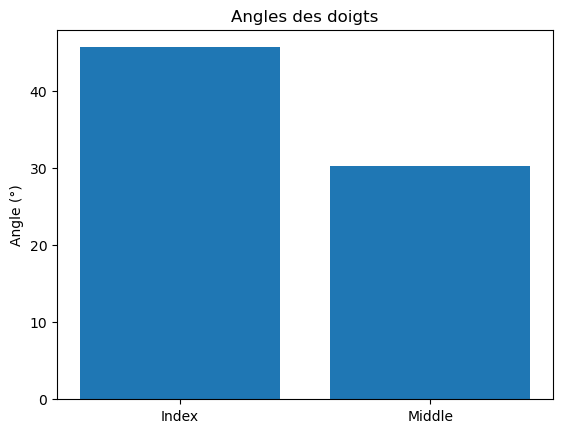

In [24]:
angles = [45.6, 30.2]
labels = ["Index", "Middle"]

plt.bar(labels, angles)
plt.ylabel("Angle (°)")
plt.title("Angles des doigts")
plt.show()


In [94]:
import pandas as pd
import numpy as np

# Création du DataFrame avec colonnes imbriquées
columns = ['Frame', 'RTime', 'MTime']

# Ajouter 21 colonnes pour les keypoints (chacune contiendra un tuple)
columns += [("RePos", f"Keypt{i}") for i in range(21)]
columns += [("WoPos", f"Keypt{i}") for i in range(21)]
# Conversion en MultiIndex pour l'imbrication

df = pd.DataFrame(frames_data, columns=columns)


# Initialiser le DataFrame vide
frame_idx = 0
frames_data = []

for frame_idx in range(1111):  # Exemple avec 100 frames
    relative_time = frame_idx * 0.033  # Simulation d'une vidéo à ~30 FPS
    absolute_time = pd.Timestamp.now(tz="America/Montreal")  # Heure locale
    
    # Simulation des positions des keypoints
    relative_positions = [(np.random.random(), np.random.random(), np.random.random()) for _ in range(21)]
    real_positions = [(np.random.random()*10, np.random.random()*10, np.random.random()*10) for _ in range(21)]
    
    # Stocker les données
    row = [frame_idx, relative_time, absolute_time] + relative_positions + real_positions
    frames_data.append(row)

# Convertir en DataFrame


In [95]:
display(df)

,Frame,RTime,MTime,"(RePos, Keypt0)","(RePos, Keypt1)","(RePos, Keypt2)","(RePos, Keypt3)","(RePos, Keypt4)","(RePos, Keypt5)","(RePos, Keypt6)",...,"(WoPos, Keypt11)","(WoPos, Keypt12)","(WoPos, Keypt13)","(WoPos, Keypt14)","(WoPos, Keypt15)","(WoPos, Keypt16)","(WoPos, Keypt17)","(WoPos, Keypt18)","(WoPos, Keypt19)","(WoPos, Keypt20)"
0,0,0.000,2025-03-19 14:26:37.128927-04:00,"(0.7829911331444115, 0.7456720218999577, 0.954...","(0.6935118893622197, 0.38792473683037043, 0.68...","(0.8780911991473649, 0.8141716418755633, 0.967...","(0.8748201272944315, 0.39861154924963627, 0.15...","(0.677644580453895, 0.8062422473122299, 0.8633...","(0.12139120829116956, 0.9756626296329378, 0.13...","(0.9744095447040255, 0.7906107764477638, 0.176...",...,"(4.18685520137204, 3.9352048136331064, 4.19403...","(2.609646044581254, 5.037374123854184, 5.00434...","(3.624048201240745, 1.703586539881573, 3.85497...","(6.367442821445128, 1.672386565638192, 8.83088...","(6.556402106097835, 7.262021954846405, 1.49898...","(8.58977301230045, 3.2038690577482765, 4.59729...","(9.492735065623947, 4.470492703624489, 3.62019...","(9.912113399785417, 6.291998760544484, 9.95409...","(4.266189175781358, 5.2158519035734665, 8.7010...","(5.0090348922354275, 5.864129851640163, 0.2466..."
1,1,0.033,2025-03-19 14:26:37.128927-04:00,"(0.17429996101255762, 0.9689095665011134, 0.37...","(0.6804494434002669, 0.9554747196745259, 0.859...","(0.5674268744247764, 0.12441299055062827, 0.90...","(0.4629809316420408, 0.48074333293206617, 0.52...","(0.1371745858268364, 0.2813707792490002, 0.751...","(0.4993908919264074, 0.5282202641939702, 0.465...","(0.7529194454113181, 0.3341059530801801, 0.875...",...,"(2.2329888401004205, 0.8020683377218119, 2.634...","(9.859267833161185, 9.603928674231856, 9.57747...","(7.623585254480313, 9.76337314155294, 6.876615...","(8.557026225540504, 9.043748745254591, 6.64074...","(6.953128160198244, 1.0855120804492213, 8.0264...","(9.081354721738094, 7.572473905858522, 5.60281...","(9.391211485161934, 0.22760271274457677, 4.520...","(6.415057024342877, 9.199297892573759, 1.78626...","(1.3474804678373964, 3.8280591297082167, 7.038...","(8.325796811173845, 6.09260520379861, 5.100004..."
2,2,0.066,2025-03-19 14:26:37.128927-04:00,"(0.02345417259436966, 0.04856220544967116, 0.2...","(0.12155648950327747, 0.11747054921964462, 0.4...","(0.5781616900150487, 0.9074061601276139, 0.057...","(0.5355410394166673, 0.4318995390580036, 0.041...","(0.4958410465754791, 0.7860496782448421, 0.887...","(0.641101002189871, 0.9150775385176341, 0.9770...","(0.14952775931584295, 0.8153332853424089, 0.93...",...,"(4.388224373114271, 8.232267956400502, 2.24049...","(1.2718027438315138, 8.007954376240377, 3.5307...","(8.941302141777221, 4.179987746398223, 4.74427...","(0.8989101508257091, 3.4425124592624323, 6.518...","(0.345639628885126, 5.899305246403699, 6.43781...","(4.135453509844519, 5.274737783674413, 3.11209...","(2.5190066260780366, 9.00236572012607, 4.93687...","(7.934797342508013, 2.8308635827101316, 6.0499...","(1.7626482888461792, 6.3285956375856465, 4.304...","(4.242973735385648, 6.248324987757952, 1.54047..."
3,3,0.099,2025-03-19 14:26:37.128927-04:00,"(0.968972230902831, 0.5009296049974953, 0.5273...","(0.6088247165178732, 0.7371811413471939, 0.995...","(0.912075958454488, 0.13238582014344813, 0.943...","(0.13422187688337206, 0.6157881419303279, 0.50...","(0.7734497433607596, 0.04136000234401738, 0.89...","(0.1085837631045381, 0.6537051249561692, 0.400...","(0.4925954967695815, 0.43648499792552975, 0.88...",...,"(0.5449349118098579, 2.844076887008433, 2.8953...","(6.455777294953014, 7.931307351646765, 7.85820...","(8.757730900737164, 4.429724499983573, 7.36643...","(0.19762444502453458, 6.716514592463768, 7.574...","(9.026165665501317, 7.313228031889453, 4.24079...","(7.761289318443759, 2.6042958937899696, 3.9171...","(3.133465075781369, 6.477378667194676, 2.21858...","(2.2707105481534393, 3.2772588158765137, 0.653...","(4.3332737336510005, 7.792769992834042, 

In [99]:
import pandas as pd

# Création de données avec des colonnes imbriquées
data = {
    'Personne': ['Alice', 'Bob', 'Charlie'],
    'Détails': [
        {'Âge': 25, 'Ville': 'Paris'},
        {'Âge': 30, 'Ville': 'Lyon'},
        {'Âge': 22, 'Ville': 'Marseille'}
    ]
}

# Création du DataFrame
df = pd.DataFrame(data)

print(df)

  Personne                            Détails
0    Alice      {'Âge': 25, 'Ville': 'Paris'}
1      Bob       {'Âge': 30, 'Ville': 'Lyon'}
2  Charlie  {'Âge': 22, 'Ville': 'Marseille'}


In [100]:
# Accéder à l'âge de chaque personne
df['Âge'] = df['Détails'].apply(lambda x: x['Âge'])

print(df)


  Personne                            Détails  Âge
0    Alice      {'Âge': 25, 'Ville': 'Paris'}   25
1      Bob       {'Âge': 30, 'Ville': 'Lyon'}   30
2  Charlie  {'Âge': 22, 'Ville': 'Marseille'}   22


In [115]:
# incomes per person, inflation adjusted, US $ 2000, source World Bank
f = {'Argentina': [],
                        'Egypt': [],
                   'Mexico':[]
                  
                  }

In [112]:
df

,Argentina,Egypt


In [172]:
agentina = []
egypt = []
mexico = []

In [176]:


for  i in range (3):
    agentina.append(i * 1)
    egypt.append((i + 1)* 2)
    mexico.append(i * 10)

df = pd.DataFrame({"Am":{"a":agentina,"m":mexico},
                             "Af":{"e":egypt},
                             })


SyntaxError: closing parenthesis '}' does not match opening parenthesis '[' (4161841401.py, line 6)

In [177]:
df

,Am,Af
a,"[0, 1, 2]",NaN
m,"[0, 10, 20]",NaN
e,NaN,"[2, 4, 6]"
